# Importa as bibliotecas necessárias

In [24]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Carrega os dados

In [25]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Explora o formato do dataset

In [26]:
train_images.shape

(60000, 28, 28)

Existem 6000 imagens no conjunto de treino e cada imagem é representada por 28 x 28 pixels.

In [27]:
len(train_labels)

60000

Existem 6000 labels no conjunto de treino.

In [28]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Cada label é um inteiro entre 0 e 9.

In [29]:
test_images.shape

(10000, 28, 28)

Existem 10000 imagens no conjunto de teste.

In [30]:
len(test_labels)

10000

Existem 10000 labels no conjunto de teste.

In [31]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

# Pré-processamento dos dados

Inicialmente iremos visualizar a primeira imagem do conjunto de treino.

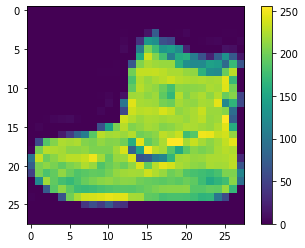

In [32]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Como podemos ver, os valores dos pixels estão entre 0 e 255. Portanto, para normalizar os valores no intervalo entre 0 e 1, podemos dividir os valores, tanto do conjunto de treino como o de teste, por 255.

In [33]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Para verificar se os dados estão no formato correto e prontos para serem usados para construir e treinar a rede, podemos visualizar as primeiras 15 imagens do conjunto de treinamento.

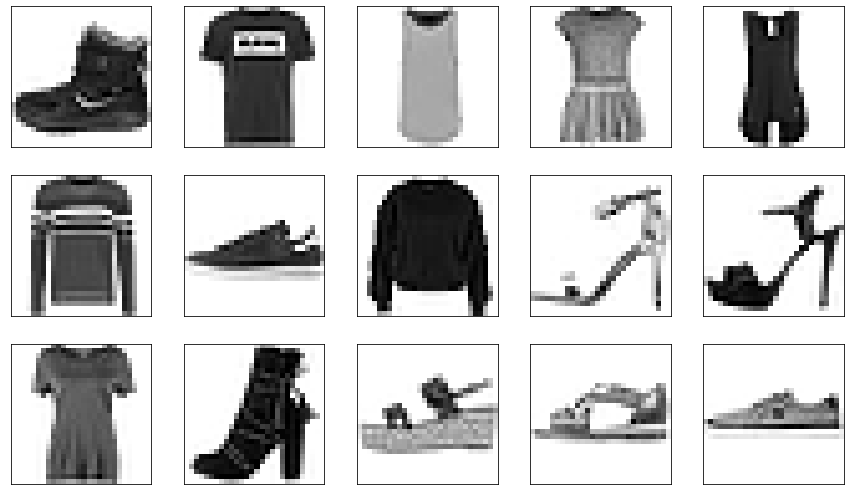

In [34]:
plt.figure(figsize=(15,15))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
plt.show()

# Construindo o modelo

No código abaixo, a primeira camada da rede, tf.keras.layers.Flatten, transforma o formato da imagem de uma matriz de imagens de duas dimensões (28 x 28 pixels) para um vetor (de 28 * 28 = 784 pixels). A rede consiste de uma sequência de duas camadas tf.keras.layers.Dense. A primeira camada Dense tem 50 neurônios e usa a ativação ReLU. A última camada é uma softmax de 10 neurônios. Note que o número de neurônios na camada de saída deve ser igual ao número de classes. Essa camada retorna um vetor de 10 probabilidades, cuja soma resulta em 1. Cada neurônio contem um valor que indica a probabilidade de que aquela imagem pertence a uma das 10 classes.

In [35]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(50, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


Antes de treinar o modelo, ainda é necessário configurar a função de custo, o otimizador e monitorar os passos de treinamento e teste. Abaixo, o otimizador usado foi o Adam, a função de custo sparse categorical crossentroppy (usada quando as classes são mutualmente exclusivas), e a métrica é a acurácia, a fração das imagens que foram classificadas corretamente.

In [36]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Treinando o modelo

Para treinar o modelo, o método model.fit é chamado.

In [37]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6698 - accuracy: 0.7673
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4090 - accuracy: 0.8556
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3706 - accuracy: 0.8686
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3371 - accuracy: 0.8799
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3179 - accuracy: 0.8829


Acima podemos ver o custo e a acurácia à medida que o modelo treina. O modelo atinge uma acurácia de 88% depois com o conjunto de treinamento depois de 5 epochs. Note que a acurácia vai de 0.76 a 0.86 inicialmente, mas depois de vai aumentando apenas 1% por epoch, o que mostra que um número maior de passos não resultaria em um aumento significativo da acurácia.

# Avaliando a acurácia

Agora, vams verificar o desempenho do modelo com o conjunto de teste e comparar com o desmpenho com o conjunto de treino.

In [38]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3623 - accuracy: 0.8713
Test accuracy: 0.8712999820709229


A performance do modelo com o conjunto de teste é de 0.87, um pouco menor do que o verificado com o conjunto de treino, o que indica overfitting.

# Fazendo predições

Após o modelo ser treinado, podemos usá-lo para fazer predições.

In [39]:
predictions = model.predict(test_images)

In [40]:
predictions[0]

array([5.4038133e-05, 1.3005317e-07, 1.3906599e-05, 2.6314265e-05,
       2.8305007e-05, 2.8000606e-02, 3.1935921e-04, 1.4331192e-01,
       9.9701248e-04, 8.2724839e-01], dtype=float32)

A predição é um vetor de 10 números, cada um representa a confiança do modelo de que a imagem corresponde a cada um dos artigos de roupa. 

In [41]:
np.argmax(predictions[0])

9

In [42]:
test_labels[0]

9

Aqui, vemos que o modelo acertou a classificação da primeira imagem do conjunto de dados, que pertence à classe 9.

Agora, o modelo treinado pode ser usado para fazer a predição de uma única imagem.

In [43]:
img = test_images[0]

print(img.shape)

(28, 28)


Adiciona a imagem a um batch de um só membro.

In [44]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Agora, podemos pedir a label correta dessa imagem.

In [45]:
predictions_single = model.predict(img)

print(predictions_single)

[[5.4038221e-05 1.3005327e-07 1.3906635e-05 2.6314310e-05 2.8305054e-05
  2.8000595e-02 3.1936006e-04 1.4331210e-01 9.9701318e-04 8.2724822e-01]]


In [46]:
np.argmax(predictions_single[0])

9

O modelo, de novo, previu a label como 9.